In [1]:
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Limit GPU Memory Growth to only what's needed
import tensorflow as tf 
physical_devices = tf.config.list_physical_devices('GPU')

try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    print('Failed to limit GPU memory')

In [24]:
#Gather Pre-proccessed images 

train_path = 'dataset-classification/train-resized'
valid_path = 'dataset-classification/validate-resized'

train_generator = ImageDataGenerator().flow_from_directory(train_path, target_size=(256,256))
valid_generator = ImageDataGenerator().flow_from_directory(valid_path, target_size=(256,256))


Found 2400 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [25]:
#Build Model 

base_model = MobileNetV3Large(weights='imagenet', include_top = False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
preds = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs = preds)


In [26]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_2 (Rescaling)        (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling_2[0][0]']            
                                16)                                                         

In [27]:
for layers in model.layers[:-4]:
    layers.trainable = False
    

In [28]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_2 (Rescaling)        (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling_2[0][0]']            
                                16)                                                         

In [29]:
epochs = 20

optimizer = Adam(learning_rate = 0.0001)

model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])

model.fit(train_generator, validation_data=valid_generator, epochs = epochs)

Epoch 1/20
75/75 [==============================] - 73s 771ms/step - loss: 0.4060 - accuracy: 0.8662 - val_loss: 0.2370 - val_accuracy: 0.9000
Epoch 2/20
75/75 [==============================] - 19s 255ms/step - loss: 0.1239 - accuracy: 0.9650 - val_loss: 0.1779 - val_accuracy: 0.9400
Epoch 3/20
75/75 [==============================] - 14s 181ms/step - loss: 0.0626 - accuracy: 0.9867 - val_loss: 0.1027 - val_accuracy: 0.9633
Epoch 4/20
75/75 [==============================] - 8s 102ms/step - loss: 0.0358 - accuracy: 0.9942 - val_loss: 0.0721 - val_accuracy: 0.9800
Epoch 5/20
75/75 [==============================] - 8s 102ms/step - loss: 0.0231 - accuracy: 0.9967 - val_loss: 0.0618 - val_accuracy: 0.9867
Epoch 6/20
75/75 [==============================] - 14s 188ms/step - loss: 0.0141 - accuracy: 0.9996 - val_loss: 0.0538 - val_accuracy: 0.9867
Epoch 7/20
75/75 [==============================] - 10s 133ms/step - loss: 0.0090 - accuracy: 0.9996 - val_loss: 0.0460 - val_accuracy: 0.9867
E

In [30]:
test_path = 'dataset-classification/test-resized'
test_generator = ImageDataGenerator().flow_from_directory(test_path, target_size=(256,256))
predictions = model.predict(x = test_generator, verbose = 0)

Found 300 images belonging to 3 classes.


In [31]:
test_labels = test_generator.classes
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
test_generator.class_indices

{'-K': 0, '-N': 1, 'FN': 2}

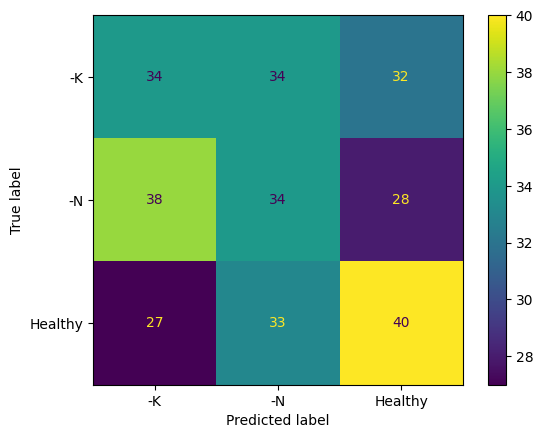

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['-K', '-N', 'Healthy'])
disp.plot()
plt.show()

In [33]:
from sklearn.metrics import classification_report 

print(classification_report(y_true=test_labels,y_pred=predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.34      0.34      0.34       100
           1       0.34      0.34      0.34       100
           2       0.40      0.40      0.40       100

    accuracy                           0.36       300
   macro avg       0.36      0.36      0.36       300
weighted avg       0.36      0.36      0.36       300



In [ ]:
#model.save("MNetLarge.h5")